# (A)Car_views_image_dataset

# 1.Import Libraries

In [28]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt


# 2.Image data generator - data preprocessing


In [29]:
IMAGE_SIZE=224
BATCH_SIZE=64

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1)

validation_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

In [30]:
train="training"
train_genarator=train_datagen.flow_from_directory(
    train,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
    

) 
test="validation"
validation_generator=validation_datagen.flow_from_directory(
    test,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
    

) 
    


Found 960 images belonging to 3 classes.
Found 171 images belonging to 3 classes.


In [31]:
print("Integer values of classes:")
train_genarator.class_indices

Integer values of classes:


{'front': 0, 'rear': 1, 'side': 2}

# 3.VGG16 model

In [32]:
IMAGE_SIZE=[224,224]
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
vgg.output


<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [33]:
for layer in vgg.layers:
    layer.trainable=False
    

In [34]:
x=Flatten()(vgg.output)
prediction=Dense(3,activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

# 4.Train the model

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
fn11='log2.csv'
history_logger=tf.keras.callbacks.CSVLogger(fn11,separator=",",append=True)

In [100]:
epoch=10

history=model.fit(train_genarator,
                  steps_per_epoch=len(train_genarator),
                  epochs=epoch,
                  callbacks=[history_logger],
                  validation_data=validation_generator,
                  validation_steps=len(validation_generator)
                 )

Epoch 1/10
15/15 [==============================] - 214s 14s/step - loss: 1.5790 - accuracy: 0.4323 - val_loss: 1.1580 - val_accuracy: 0.5205
Epoch 2/10
15/15 [==============================] - 232s 16s/step - loss: 0.7946 - accuracy: 0.6396 - val_loss: 0.9005 - val_accuracy: 0.6023
Epoch 3/10
15/15 [==============================] - 238s 16s/step - loss: 0.6291 - accuracy: 0.7479 - val_loss: 0.8291 - val_accuracy: 0.6491
Epoch 4/10
15/15 [==============================] - 233s 16s/step - loss: 0.5355 - accuracy: 0.7885 - val_loss: 0.7610 - val_accuracy: 0.6959
Epoch 5/10
15/15 [==============================] - 240s 16s/step - loss: 0.4610 - accuracy: 0.8354 - val_loss: 0.7611 - val_accuracy: 0.6901
Epoch 6/10
15/15 [==============================] - 223s 15s/step - loss: 0.4220 - accuracy: 0.8573 - val_loss: 0.7549 - val_accuracy: 0.6901
Epoch 7/10
15/15 [==============================] - 209s 14s/step - loss: 0.3637 - accuracy: 0.8854 - val_loss: 0.8325 - val_accuracy: 0.6667
Epoch 

# Model accuracy

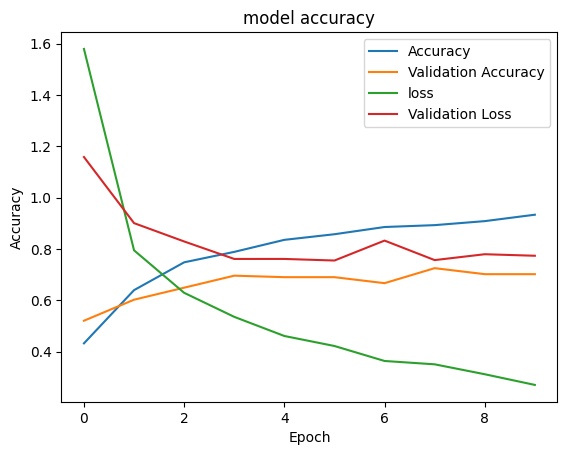

In [101]:

plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()




# 5.Test the model

# Test_Image1

1/1 [==============================] - 0s 168ms/step
[[6.392586e-26 1.000000e+00 0.000000e+00]]

VIEW OF THE CAR IMAGE:
rear image


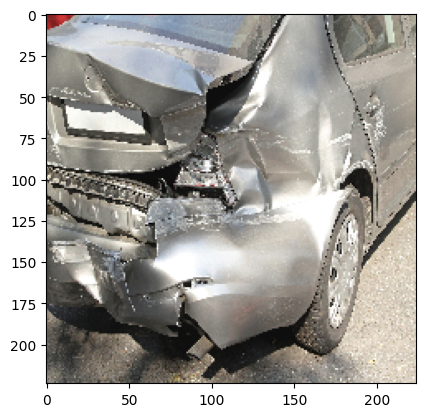

In [102]:
from tensorflow.keras.models import load_model
mod1=load_model("m.h5")
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
img_pred=load_img("test/rearside.jpg",target_size=(224,224))
plt.imshow(img_pred, cmap=plt.get_cmap('gray'))

img_pred=img_to_array(img_pred)

img_pred=np.expand_dims(img_pred, axis=0)

rslt= model.predict(img_pred)

print(rslt)
print()
if rslt[0][0]>rslt[0][1]:
    if rslt[0][2]>rslt[0][0]:
        prediction="side image"
    else:   
        prediction="front image"
    
else:
    prediction="rear image"
print("VIEW OF THE CAR IMAGE:")
print(prediction)

# Test_Image2

1/1 [==============================] - 0s 173ms/step
[[1. 0. 0.]]

VIEW OF THE CAR IMAGE:
front image


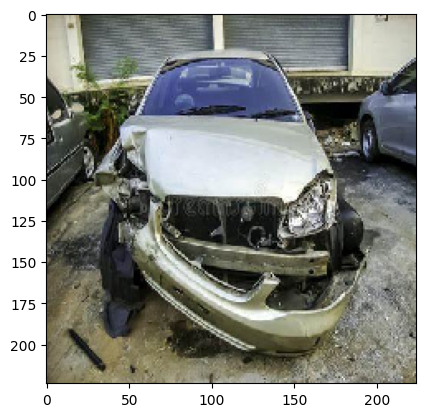

In [103]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
img_pred=load_img("test/frontside.jpg",target_size=(224,224))
plt.imshow(img_pred, cmap=plt.get_cmap('gray'))

img_pred=img_to_array(img_pred)

img_pred=np.expand_dims(img_pred, axis=0)

rslt= model.predict(img_pred)

print(rslt)
print()
if rslt[0][0]>rslt[0][1]:
    if rslt[0][2]>rslt[0][0]:
        prediction="rear image"
    else:   
        prediction="front image"
    
else:
    prediction="side image"
print("VIEW OF THE CAR IMAGE:")
print(prediction)

# (B)Damage_level_Image_dataset


# 1.Preprocessing

In [69]:
IMAGE_SIZE_damage=224
BATCH_SIZE_damage=32
train_datagen_damage=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1)

validation_datagen_damage=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

In [70]:
train_damage="training_damage"
train_generator_damage=train_datagen_damage.flow_from_directory(
    train_damage,
    target_size=(IMAGE_SIZE_damage,IMAGE_SIZE_damage),
    batch_size=BATCH_SIZE_damage
    

) 
test_damage="validation_damage"
validation_generator_damage=validation_datagen_damage.flow_from_directory(
    test_damage,
    target_size=(IMAGE_SIZE_damage,IMAGE_SIZE_damage),
    batch_size=BATCH_SIZE_damage
) 

Found 571 images belonging to 3 classes.
Found 35 images belonging to 3 classes.


In [71]:
print("Integer values of classes:")
train_generator_damage.class_indices

Integer values of classes:


{'high': 0, 'low': 1, 'severe': 2}

# 2.VGG16 model

In [72]:
IMAGE_SIZE_damage=[224,224]
vgg_damage=VGG16(input_shape=IMAGE_SIZE_damage+[3],weights='imagenet',include_top=False)
vgg_damage.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [73]:
for layer_d in vgg_damage.layers:
    layer_d.trainable=False

In [74]:
x_d=Flatten()(vgg_damage.output)
prediction_damage=Dense(3,activation='softmax')(x_d)
model_damage=Model(inputs=vgg_damage.input,outputs=prediction_damage)
model_damage.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [75]:
model_damage.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [76]:

fn12='log1.csv'
logger=tf.keras.callbacks.CSVLogger(fn12,separator=",",append=True)

# 3.Train the model

In [77]:
epoch_d=7
history_damage=model_damage.fit(train_generator_damage,
                  steps_per_epoch=len(train_generator_damage),
                  epochs=epoch_d,
                  callbacks=[logger],
                  validation_data=validation_generator_damage,
                  validation_steps=len(validation_generator_damage)
                 )

Epoch 1/7
18/18 [==============================] - 107s 6s/step - loss: 1.1776 - accuracy: 0.5989 - val_loss: 1.3002 - val_accuracy: 0.5714
Epoch 2/7
18/18 [==============================] - 114s 6s/step - loss: 0.6921 - accuracy: 0.7250 - val_loss: 0.8449 - val_accuracy: 0.5714
Epoch 3/7
18/18 [==============================] - 111s 6s/step - loss: 0.4477 - accuracy: 0.8179 - val_loss: 0.8123 - val_accuracy: 0.6000
Epoch 4/7
18/18 [==============================] - 115s 6s/step - loss: 0.3596 - accuracy: 0.8739 - val_loss: 0.8032 - val_accuracy: 0.6571
Epoch 5/7
18/18 [==============================] - 116s 6s/step - loss: 0.2686 - accuracy: 0.9089 - val_loss: 0.8715 - val_accuracy: 0.6286
Epoch 6/7
18/18 [==============================] - 118s 7s/step - loss: 0.2571 - accuracy: 0.9159 - val_loss: 0.7941 - val_accuracy: 0.6857
Epoch 7/7
18/18 [==============================] - 119s 7s/step - loss: 0.2546 - accuracy: 0.9089 - val_loss: 1.2429 - val_accuracy: 0.6286


# Model accuracy

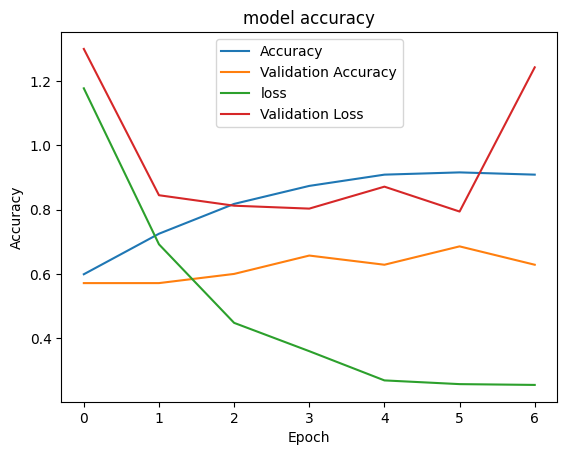

In [78]:

plt.plot(history_damage.history["accuracy"])
plt.plot(history_damage.history['val_accuracy'])
plt.plot(history_damage.history['loss'])
plt.plot(history_damage.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()


# 4.Test the model


# Test a damage level


1/1 [==============================] - 0s 156ms/step
[[9.9996555e-01 3.4424826e-05 1.5310706e-24]]

DAMAGE LEVEL:

mild damage


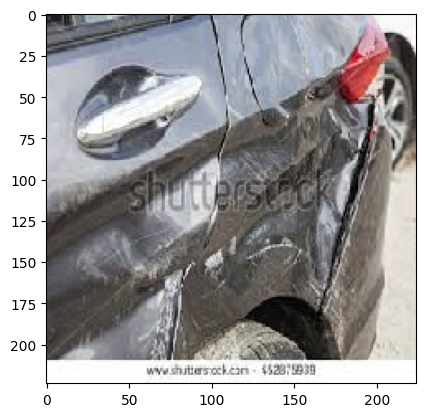

In [92]:
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow import keras

import numpy as np
img_pred_1=load_img("test/car2.jpg",target_size=(224,224))
plt.imshow(img_pred_1, cmap=plt.get_cmap('gray'))

img_pred_1=img_to_array(img_pred_1)
img_pred_1=np.expand_dims(img_pred_1, axis=0)

print()
rst=model_damage.predict(img_pred_1)

if rst[0][0]>rst[0][1]:
    if rst[0][2]>rst[0][0]:
        predicts="low damage"
    else:   
        predicts="mild damage"
    
else:
    predicts="severe damage"

print(rst)
print()
print("DAMAGE LEVEL:")
print()
print(predicts)


# New section --- Test both views and damage level of the car

1/1 [==============================] - 0s 184ms/step
[[0.967842   0.03215803 0.        ]]

VIEW OF THE CAR IMAGE:
front image
__________________

1/1 [==============================] - 0s 171ms/step
[[1.7107009e-23 1.0000000e+00 0.0000000e+00]]

DAMAGE LEVEL:
severe damage


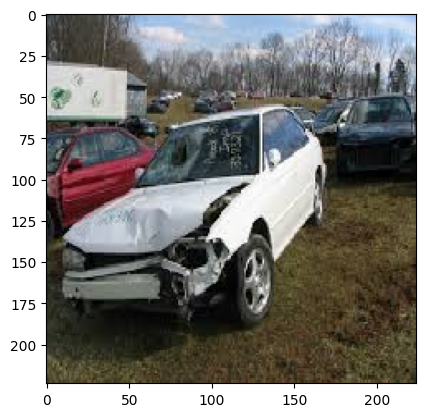

In [105]:
pred1=load_img("test/car1.jpg",target_size=(224,224))
plt.imshow(pred1, cmap=plt.get_cmap('gray'))

pred1=img_to_array(pred1)

pred1=np.expand_dims(pred1, axis=0)

result1= model.predict(pred1)

print(result1)
print("")
if result1[0][0]>result1[0][1]:
    if result1[0][2]>result1[0][0]:
        prediction="rear image"
    else:   
        prediction="front image"
    
else:
    prediction="side image"
print("VIEW OF THE CAR IMAGE:")
print(prediction)
print("__________________")
print()
result2=model_damage.predict(pred1)

if result2[0][0]>result2[0][1]:
    if result2[0][2]>result2[0][0]:
        predict="low damage"
    else:   
        predict="mild damage"
    
else:
    predict="severe damage"

print(result2)
print()
print("DAMAGE LEVEL:")
print(predict)